In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [443]:
# Data loading

loan = pd.read_csv('loan.csv')
loan.head()

C:\Users\sriva\AppData\Local\Temp\ipykernel_3724\31476498.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [444]:
loan.shape

(39717, 111)

In [445]:
# Print all columns
for col in loan.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

# Data Cleaning

In [446]:
#Check all columns that are null
print(loan.isnull().all(axis=0).sum())

54


In [447]:
# Percentage of null values in columns
for col in loan.columns:
    print(col, (loan[col].isnull().sum()/ len(loan))*100)

id 0.0
member_id 0.0
loan_amnt 0.0
funded_amnt 0.0
funded_amnt_inv 0.0
term 0.0
int_rate 0.0
installment 0.0
grade 0.0
sub_grade 0.0
emp_title 6.191303472064859
emp_length 2.7066495455346575
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_d 0.0
loan_status 0.0
pymnt_plan 0.0
url 0.0
desc 32.58554271470655
purpose 0.0
title 0.027695948838029054
zip_code 0.0
addr_state 0.0
dti 0.0
delinq_2yrs 0.0
earliest_cr_line 0.0
inq_last_6mths 0.0
mths_since_last_delinq 64.66248709620565
mths_since_last_record 92.98537150338646
open_acc 0.0
pub_rec 0.0
revol_bal 0.0
revol_util 0.12589067653649572
total_acc 0.0
initial_list_status 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_pymnt 0.0
total_pymnt_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_pymnt_d 0.1787647606818239
last_pymnt_amnt 0.0
next_pymnt_d 97.12969257496789
last_credit_pull_d 0.0050356270614598285
collections_12_mths_ex_med 0.1409975577208752
mths_since_las

### 1. Drop unwanted columns

In [448]:
# Drop all columns which doesn't have any values

arr = []
for col in loan.columns:
    if loan[col].isnull().sum() == len(loan):
        arr.append(col)
loan.drop(labels=arr, axis = 1, inplace=True)

In [449]:
loan.shape

(39717, 57)

### 2. Data impute

In [450]:
# emp_length
loan.emp_length.fillna('-1', inplace=True)
loan['emp_length'] = loan.emp_length.str.extract('(\d+)')
loan.emp_length

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [451]:
# pub_rec_bankruptcies 
loan.pub_rec_bankruptcies.isnull().sum()
loan.pub_rec_bankruptcies.fillna(-1, inplace=True)
loan.pub_rec_bankruptcies

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712   -1.0
39713   -1.0
39714   -1.0
39715   -1.0
39716   -1.0
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

In [452]:
# int_rate 
loan['int_rate'] = loan.int_rate.str.rstrip('%')
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [453]:
# Convert numeric columns to number fields
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

In [454]:
# Percentage loan_status review
round((loan.loan_status.value_counts()*100)/len(loan), 2)

loan_status
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: count, dtype: float64

In [455]:
# loan purpose
round((loan.purpose.value_counts()*100)/len(loan), 2)

purpose
debt_consolidation    46.93
credit_card           12.92
other                 10.05
home_improvement       7.49
major_purchase         5.51
small_business         4.60
car                    3.90
wedding                2.38
medical                1.74
moving                 1.47
vacation               0.96
house                  0.96
educational            0.82
renewable_energy       0.26
Name: count, dtype: float64

### 3. Derived columns

In [456]:
# Get year and month columns based on issue date
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year'] = loan.issue_d.dt.year
loan['month'] = loan.issue_d.dt.month

In [457]:
# Get loan amount categories from loan_amnt
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '35000+'])

In [458]:
# Get annual income categories from annual_inc
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [459]:
# Get interest rate categories from int_rate
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20+'])

In [460]:
# Get defaulted column from loan_status
loan['IsDefaulted'] =  loan['loan_status'].apply(lambda x: 1 if (x == 'Charged Off') else 0)

In [540]:
# Get dti categories from dti
loan['dti_cats'] = pd.cut(loan['dti'], [-1, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

# Univariate Analysis

<Axes: xlabel='IsDefaulted'>

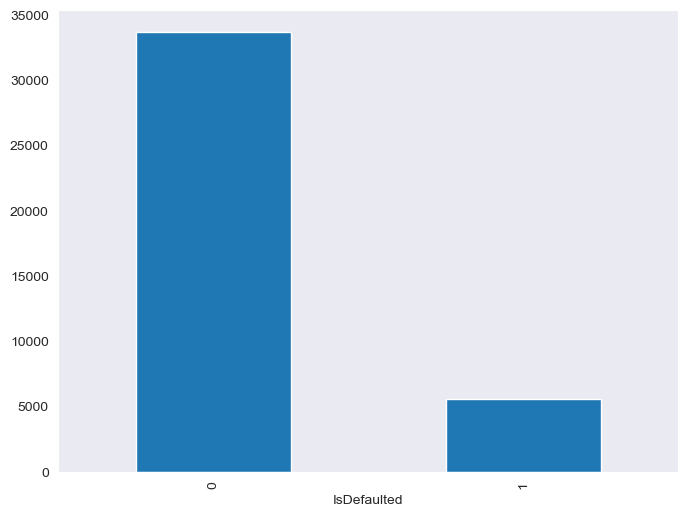

In [569]:
#Defaulter vs Non-Defaulter
#Defaulter = 1 and Non-Defaulter = 0
# we can see the ratio of defaulters vs non-defaulters
plt.figure(figsize=(8,6))
loan['IsDefaulted'].value_counts().plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

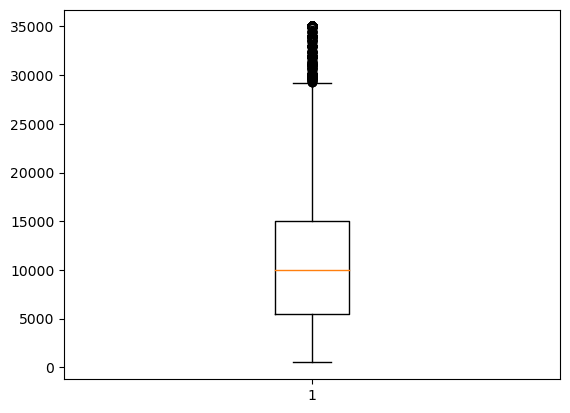

In [461]:
# loan_amnt analysis

loan['loan_amnt'].describe()
plt.boxplot(loan['loan_amnt'])
plt.show

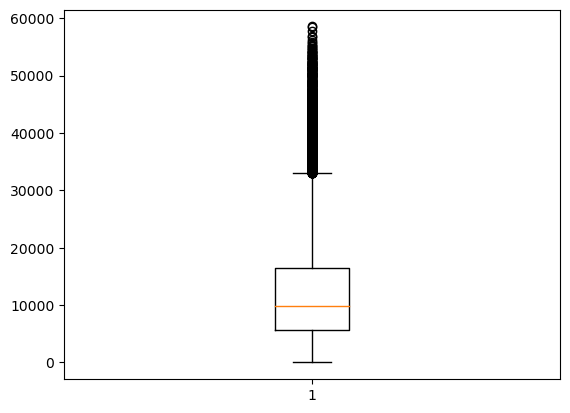

In [462]:
# total_pymnt analysis

loan.total_pymnt.describe()
plt.boxplot(loan.total_pymnt)
plt.show()

In [463]:
# annual_inc analysis

loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.99)]
loan.annual_inc.describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

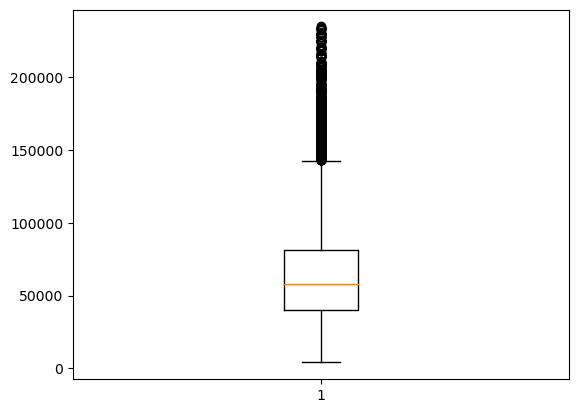

In [464]:
plt.boxplot(loan.annual_inc)
plt.show()

In [465]:
# int_rate analysis

loan.int_rate.describe()

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

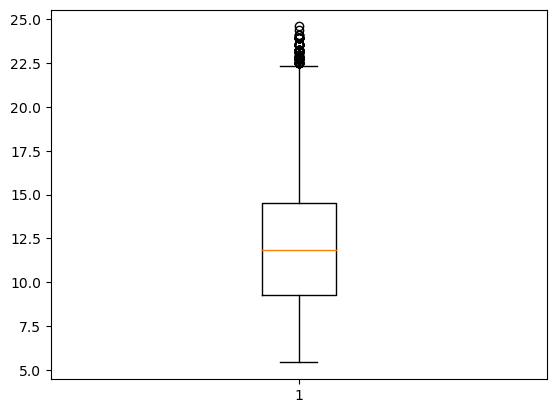

In [466]:
plt.boxplot(loan.int_rate)
plt.show()

# Data visualization

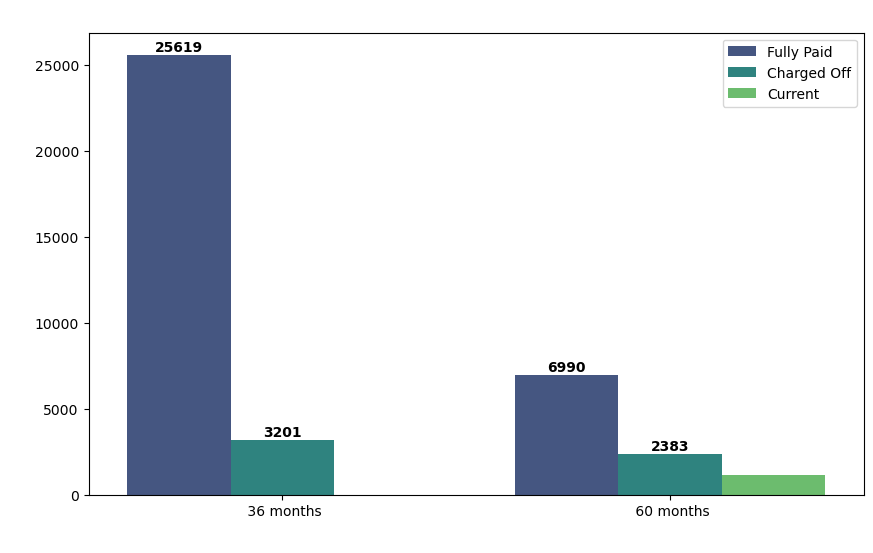

In [467]:
# Set the figure size and background color
plt.figure(figsize=(10, 6), facecolor='w')

# Create a count plot using seaborn
ax = sns.countplot(x="term", data=loan, hue='loan_status', palette='viridis')

# Set labels and title
ax.set_title('Loan Paying Term', fontsize=14, color='w')
ax.set_xlabel('Loan Repayment Term', fontsize=14, color='w')
ax.set_ylabel('Loan Application Count', fontsize=14, color='w')

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Display exact count on top of bars without a loop
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=10, color='black', weight='bold')
ax.bar_label(ax.containers[1], fmt='%d', label_type='edge', fontsize=10, color='black', weight='bold')

# Show the plot
plt.show()

In [576]:
def plot_graph(col):
    arr = []
    for val in loan[col].unique():
        arr.append(len(loan[(loan[col] == val) & (loan['IsDefaulted'] == 1)]) / len(loan[(loan[col] == val)]))
    # Hardcoded values
    categories = loan[col].unique()
    values = arr

    # Create a bar graph
    colors = ['#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
    plt.bar(categories, values, color=colors)
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90, ha='right')  # You can adjust the rotation angle as needed
    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Defaulted(%)')
    plt.title('bar graph')

    # Show the plot
    plt.show()

In [577]:
def BarChartBivariate(col, hue, data):
    plt.figure(figsize=(8,6))
    sns.barplot(x="IsDefaulted", y=col, hue=hue, data=data)

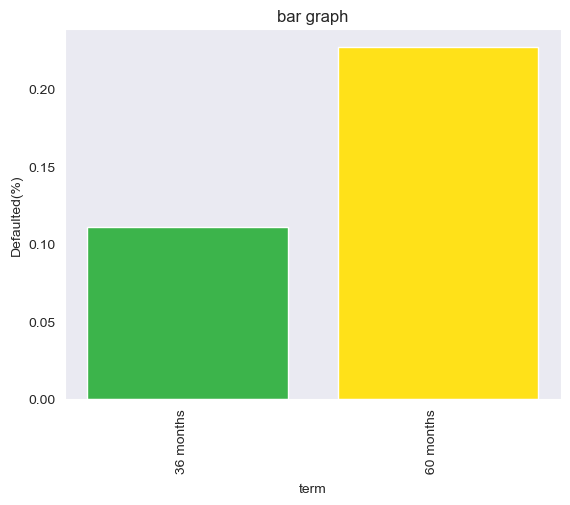

In [578]:
# term: 60 Months are defaulted more compared to 36 Months
plot_graph('term')

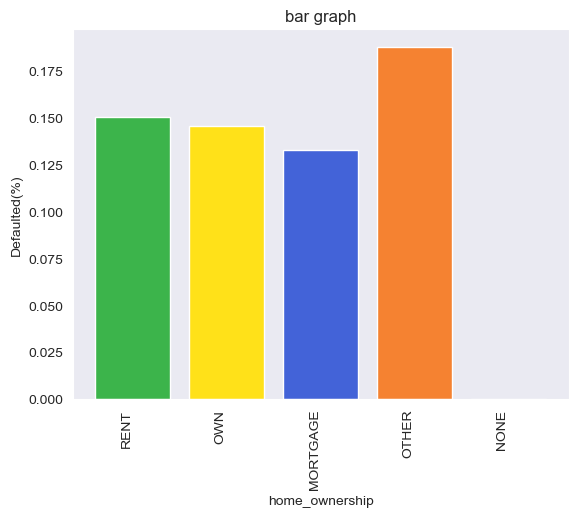

In [579]:
# home_ownership: Not a good indicator for defaulting
plot_graph('home_ownership')

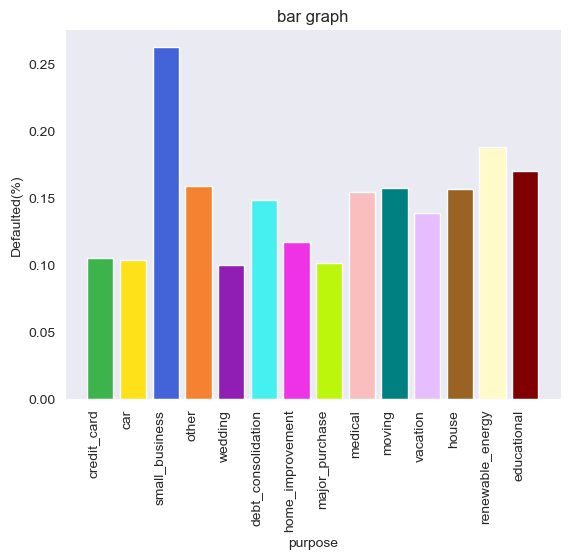

In [580]:
# Purpose: By looking at the below graph, small_business defaulted the most
plot_graph('purpose')

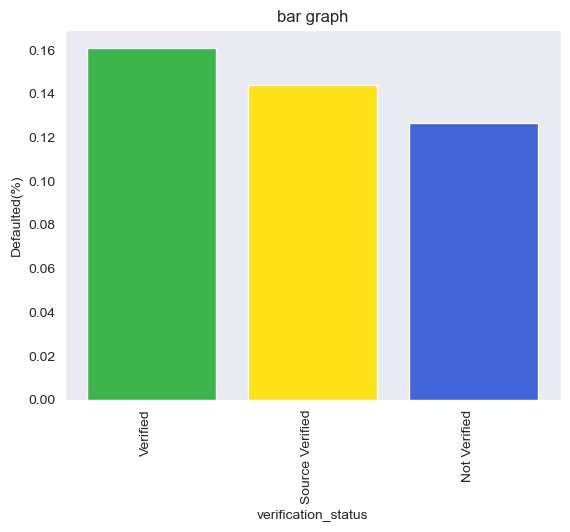

In [581]:
# verification_status: verified users have defaulted the most
plot_graph('verification_status')

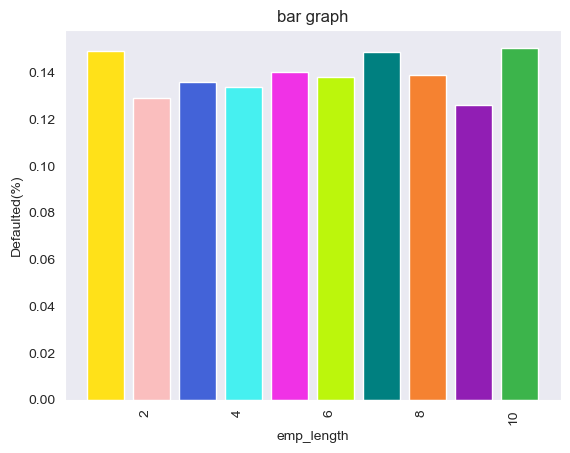

In [582]:
# emp_length: not a good indicator for loan dafault
plot_graph('emp_length')

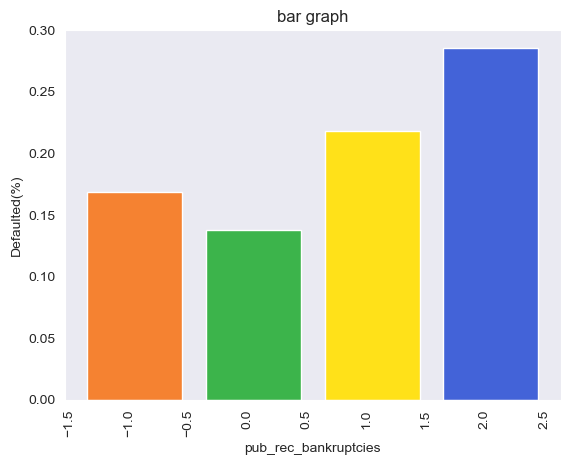

In [583]:
# pub_rec_bankruptcies: have higher default rates where bankruptcies = 2
plot_graph('pub_rec_bankruptcies')

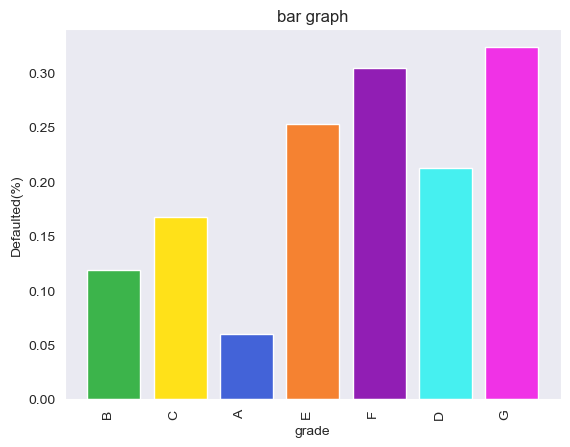

In [584]:
# grade: grade G defaulted the most and 2nd highest is F
plot_graph('grade')

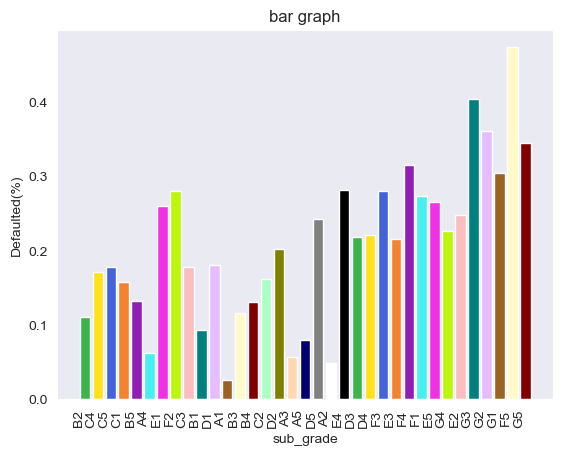

In [585]:
# sub_grade: sub-grade F5 defaulted the most
plot_graph('sub_grade')

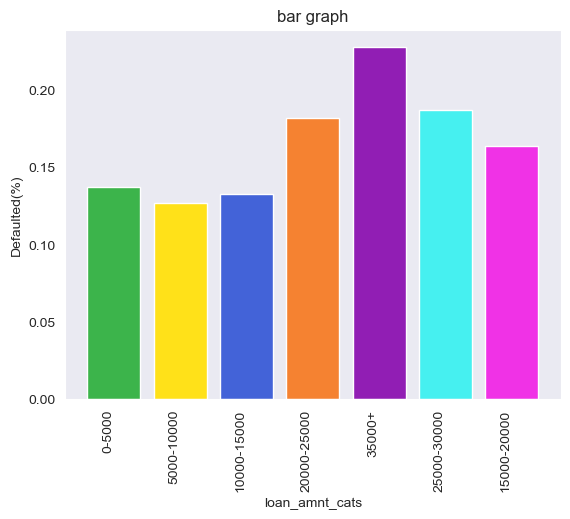

In [586]:
# loan_amnt_cats: 35000 and above defaulted the most
plot_graph('loan_amnt_cats')

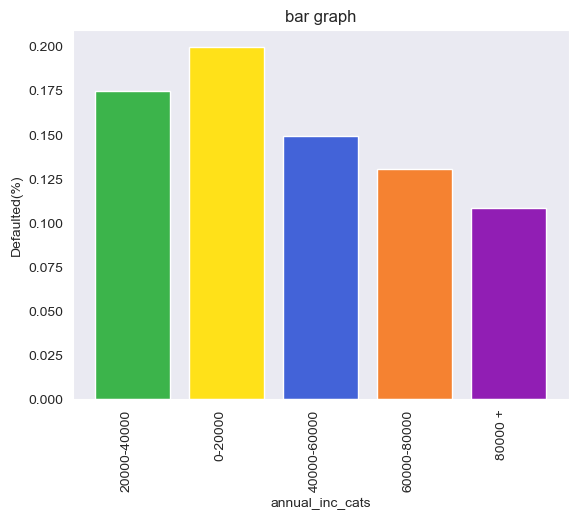

In [587]:
# annual_inc_cats: 0-20000 salary defaulted the most
plot_graph('annual_inc_cats')

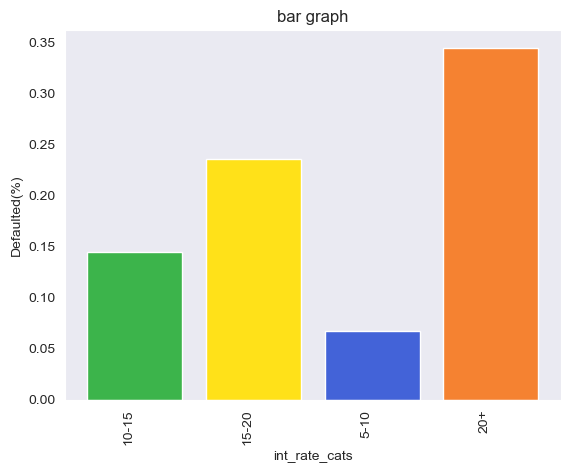

In [588]:
# int_rate_cats: 20% and above interest rates defaulted the most
plot_graph('int_rate_cats')

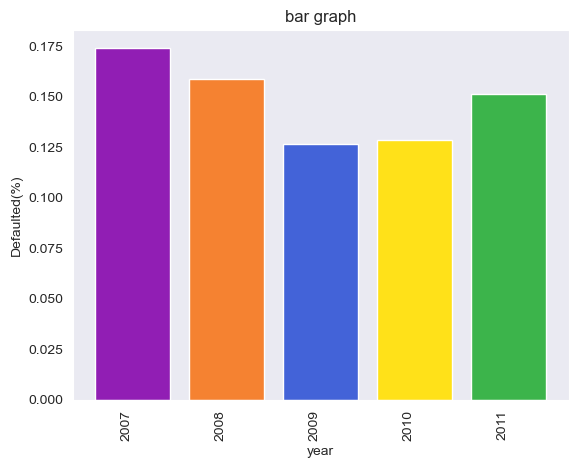

In [589]:
# year: based on the below graph, in the year 2007 there were more number of defaulters
plot_graph('year')

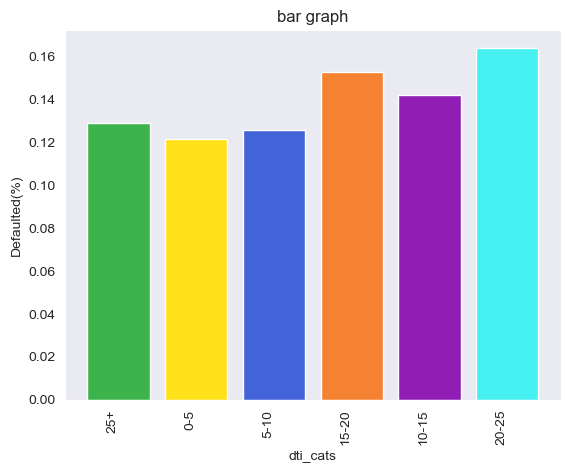

In [590]:
# dti_cats: based on the below graph, 20-25% dti have defaulted the most
plot_graph('dti_cats')

In [591]:
# purpose counts
round((loan.purpose.value_counts()*100)/len(loan), 2)

purpose
debt_consolidation    47.04
credit_card           12.94
other                 10.07
home_improvement       7.36
major_purchase         5.51
small_business         4.57
car                    3.92
wedding                2.38
medical                1.74
moving                 1.47
vacation               0.97
house                  0.94
educational            0.82
renewable_energy       0.26
Name: count, dtype: float64

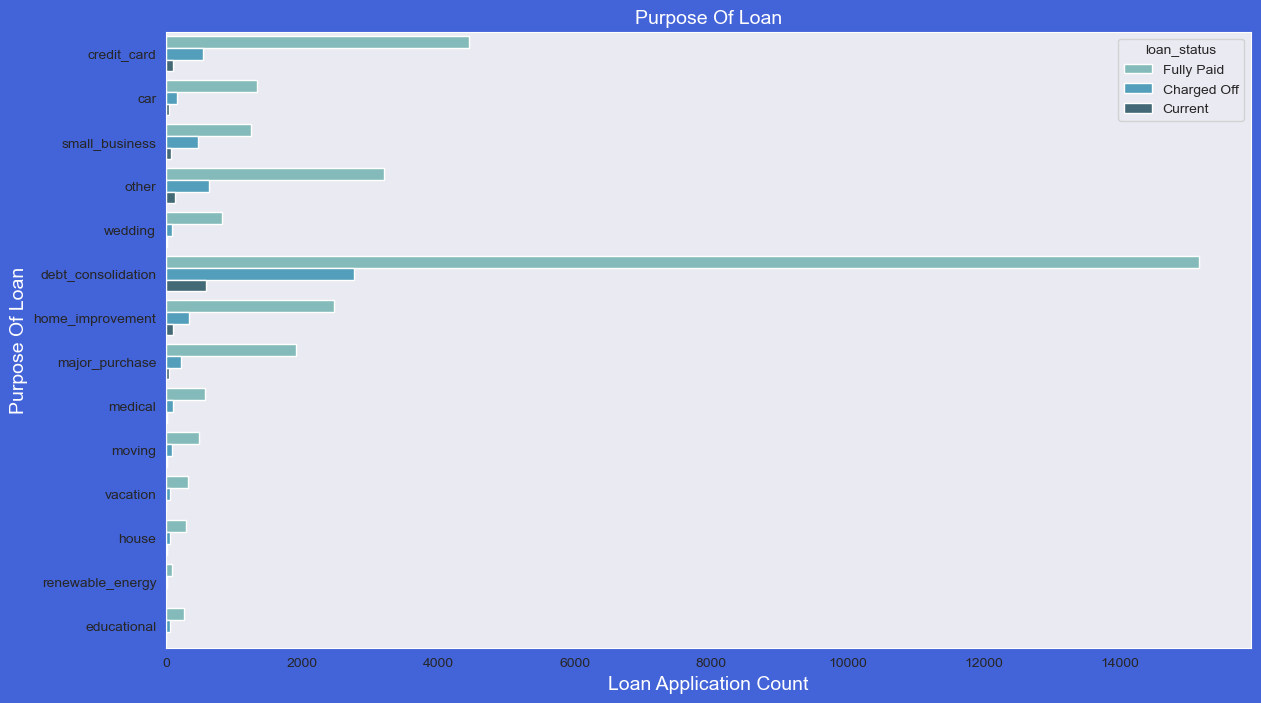

In [592]:
color = ['#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

plt.figure(figsize=(14,8),facecolor='#4363d8')
sns.set_style("dark")
by = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
by.set_title('Purpose Of Loan',fontsize=14,color='w')
by.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
by.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# debt_consolidation has been charged off the most
